In [4]:
import pickle
import numpy as np
import pandas as pd
import json
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
import seaborn as sns


import matplotlib.pyplot as plt

In [5]:
try:
  from google.colab import drive
  import os

  drive.mount('/content/drive/')
  os.chdir('/content/drive/MyDrive/AGH/MIO')
except:
  pass

Mounted at /content/drive/


# Load input data

# New Section

In [6]:
with open("data/X_train.pkl", "rb") as X_train_file, open(
    "data/X_test.pkl", "rb"
) as X_test_file, open("data/Y_train.pkl", "rb") as Y_train_file, open(
    "data/Y_test.pkl", "rb"
) as Y_test_file, open(
    "data/vocabulary.json", "rt"
) as vocabulary_file:
    X_test = pickle.load(X_test_file)
    X_train = pickle.load(X_train_file)
    Y_train = pickle.load(Y_train_file)
    Y_test = pickle.load(Y_test_file)
    vocabulary = json.load(vocabulary_file)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (32897, 5000)
X_test shape: (8225, 5000)
Y_train shape: (32897, 3)
Y_test shape: (8225, 3)


In [8]:
MAX_WORDS = X_train.shape[1]
NUM_OF_CLASSES = Y_train.shape[1]
EPOCH = 10

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(MAX_WORDS,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_CLASSES))
model.add(Activation("softmax"))

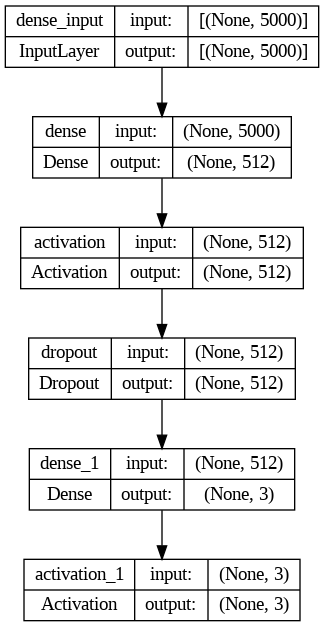

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])


In [12]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=EPOCH,
    verbose=1,
)

Epoch 1/10
515/515 [==============================] - 7s 3ms/step - loss: 0.4881 - accuracy: 0.8074 - precision: 0.8706 - recall: 0.7456
Epoch 2/10
515/515 [==============================] - 2s 3ms/step - loss: 0.2179 - accuracy: 0.9292 - precision: 0.9391 - recall: 0.9206
Epoch 3/10
515/515 [==============================] - 2s 3ms/step - loss: 0.1331 - accuracy: 0.9608 - precision: 0.9665 - recall: 0.9555
Epoch 4/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.9749 - precision: 0.9780 - recall: 0.9727
Epoch 5/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0576 - accuracy: 0.9854 - precision: 0.9872 - recall: 0.9837
Epoch 6/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0379 - accuracy: 0.9917 - precision: 0.9925 - recall: 0.9907
Epoch 7/10
515/515 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9946 - precision: 0.9952 - recall: 0.9940
Epoch 8/10
515/515 [=====================

In [13]:
loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, verbose=0)


def f1_score(precision, recall):
    """Function to calculate f1 score"""

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

print("Accuracy  : {:.4f}".format(accuracy))
print("Precision : {:.4f}".format(precision))
print("Recall    : {:.4f}".format(recall))
print("F1 Score  : {:.4f}".format(f1_score(precision, recall)))

Accuracy  : 0.9167
Precision : 0.9184
Recall    : 0.9151
F1 Score  : 0.9168


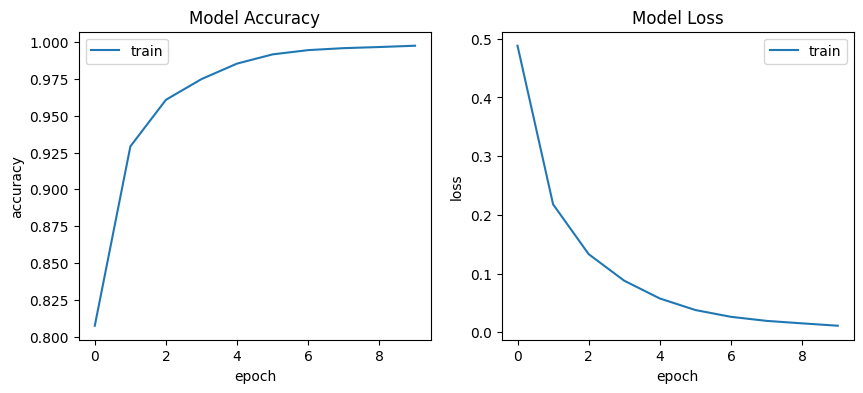

In [14]:
def plot_training_hist(history):
    """Function to plot history for accuracy and loss"""

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    # first plot
    ax[0].plot(history.history["accuracy"])
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("accuracy")
    ax[0].legend(["train", "validation"], loc="best")

    # second plot
    ax[1].plot(history.history["loss"])
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("epoch")
    ax[1].set_ylabel("loss")
    ax[1].legend(["train", "validation"], loc="best")


plot_training_hist(history)

258/258 [==============================] - 0s 1ms/step
2    4170
1    2550
0    1505
dtype: int64
2    4202
1    2501
0    1522
dtype: int64


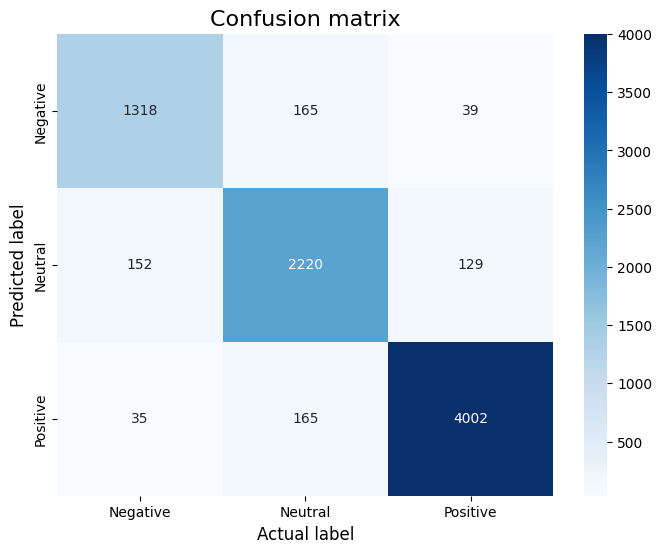

In [15]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, y_test):
    """Function to plot confusion matrix for the passed model and the data"""

    sentiment_classes = ["Negative", "Neutral", "Positive"]
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(
        np.argmax(y_pred, axis=1), np.argmax(np.array(y_test), axis=1)
    )

    print(pd.Series(np.argmax(np.array(y_test), axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        cmap=plt.cm.Blues,
        annot=True,
        fmt="d",
        xticklabels=sentiment_classes,
        yticklabels=sentiment_classes,
    )
    plt.title("Confusion matrix", fontsize=16)
    plt.xlabel("Actual label", fontsize=12)
    plt.ylabel("Predicted label", fontsize=12)


plot_confusion_matrix(model, X_test, Y_test)

In [16]:
with open("models/trump_tweets_model_v2.pkl", "wb") as model_file:
    pickle.dump(model, model_file)